In [1]:
import pandas as pd

import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

%matplotlib inline

Для начала загрузим все три датафрейма и посмотрим их основные характеристики по колонкам и содержанию данных в них

customers_datase.csv — таблица с уникальными идентификаторами пользователей

customer_id — позаказный идентификатор пользователя
customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
customer_zip_code_prefix —  почтовый индекс пользователя
customer_city —  город доставки пользователя
customer_state —  штат доставки пользователя

In [2]:
customers_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-lapitskaja/first_project_lapitskaya/olist_customers_dataset.csv')
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# смотрим на структуру данных
customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
# проверяем количество строк
customers_dataset.shape

(99441, 5)

In [5]:
#уникальные значения
customers_dataset.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

Пропущенных значений нет, количество уникальных значений customer_id соответствует количеству строк в дф, дубликатов нет

order_items_dataset.csv —  товарные позиции, входящие в заказы

order_id —  уникальный идентификатор заказа (номер чека)
order_item_id —  идентификатор товара внутри одного заказа
product_id —  ид товара (аналог штрихкода)
seller_id — ид производителя товара
shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
price —  цена за единицу товара
freight_value —  вес товара

In [6]:
order_items_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-lapitskaja/first_project_lapitskaya/olist_order_items_dataset.csv')
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
# смотрим на структуру данных
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
# проверяем количество строк
order_items_dataset.shape

(112650, 7)

In [9]:
#уникальные значения
order_items_dataset.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

orders_dataset.csv —  таблица заказов

order_id —  уникальный идентификатор заказа (номер чека)
customer_id —  позаказный идентификатор пользователя
order_status —  статус заказа
order_purchase_timestamp —  время создания заказа
order_approved_at —  время подтверждения оплаты заказа
order_delivered_carrier_date —  время передачи заказа в логистическую службу
order_delivered_customer_date —  время доставки заказа
order_estimated_delivery_date —  обещанная дата доставки

In [10]:
orders_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-lapitskaja/first_project_lapitskaya/olist_orders_dataset.csv')
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
# смотрим на структуру данных
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
# проверяем количество строк
orders_dataset.shape

(99441, 8)

При анализе таблиц видим, что кол-во order_id в orders_dataset отличается от кол-ва order_id в  order_items_dataset

In [13]:
unique_order_status = orders_dataset['order_status'].unique()
print(unique_order_status)

['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


# 1. Какое количество пользователей совершили покупку только один раз?

In [14]:
# Объединяем дф customers_dataset и orders_dataset по колонке customer_id
df1 = pd.merge(customers_dataset, orders_dataset, on =  'customer_id')

In [15]:
df1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [16]:
df1.shape

(99441, 12)

In [17]:
#Видим пропуски в столбцах
missing_values = df1.isna().sum()
print(missing_values)

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [18]:
# Проверяем статусы заказов
unique_order_status = df1['order_status'].unique()
print(unique_order_status)

['delivered' 'canceled' 'invoiced' 'shipped' 'processing' 'unavailable'
 'approved' 'created']


In [19]:
# посчитаем количество строк по каждому статусу
order_status_counts = df1['order_status'].value_counts()
print(order_status_counts)

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64


В текущем анализе покупкой будем считать не только заказы со статусом delivered, но и shipped и invoiced - эти статусы говорят о том, что заказ прошел все стадии предобработки перед отгрузкой и либо уже едет к получателю, либо подготовлен к отгрузке

In [20]:
filtered_df = df1[df1['order_status'].isin(['delivered', 'shipped', 'invoiced'])]
order_status_counts = filtered_df['order_status'].value_counts()

print(order_status_counts)


delivered    96478
shipped       1107
invoiced       314
Name: order_status, dtype: int64


In [21]:
# Считаем количество заказов для каждого пользователя
order_counts = filtered_df.groupby('customer_unique_id')\
    .agg('order_id').nunique().reset_index(name='order_count')

In [22]:
# Фильтруем пользователей с одним заказом
users_with_one_order = order_counts.query('order_count == 1')

In [23]:
# Находим количество пользователей с одним заказом
num_users_with_one_order = len(users_with_one_order)
print("Количество пользователей с одним заказом:", num_users_with_one_order)

Количество пользователей с одним заказом: 91821


# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Для целостной логики решения, необходимо определимся с тем, что на даном шаге мы можем считать причиной, по которой товар не доставлен. В эту категорию я включаю заказы со статусом:
canceled - заказ по каким-то причинам был отменен и не был доставлен (возможно, его отменил сам покупатель),
unavailable - товара на момент заказа могло не быть в наличии, либо это сбой в системе

Остальные статусы заказа находятся на шагах обработки, они имеют вероятность по цепочке обработки перейти в  delivered или оказаться в отсеенных категориях
(approved - заказ был подтвержден, но никакой дополнительной информации по согласованию нет, можно сказать, что это начальный этап и мы не можем знать, сколько времени пройдет до статуса delivered
processing -  заказ находится в процессе обработки и еще не прошел дальнейшие шаги перед отгрузкой
invoiced - счет на заказ был выставлен, но заказ еще не отгружен
shipped - заказ был отправлен, но еще не был доставлен получателю)


In [24]:
# Создаем новый датафрейм на основе orders_dataset и фильтруем дф по выбранным статусам
df2 = orders_dataset[orders_dataset['order_status'].isin(['canceled', 'unavailable'])]

In [25]:
# Преобразовываем столбцы с датами в DataFrame orders_dataset в формат datetime и Добавляем колонку month, чтобы разбить данные по заказам помесячно
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
df2[date_columns] = df2[date_columns].apply(pd.to_datetime, errors='coerce', infer_datetime_format=True)
df2['month'] = df2['order_purchase_timestamp'].dt.month

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
# Группируем данные по столбцам 'month' и 'order_status', затем считаем количество строк в каждой группе и преобразуем результат в формат таблицы
orders_count_by_month_status = df2.groupby(['month', 'order_status']).size()\
    .unstack(fill_value=0)

In [27]:
# Суммируем данные по каждому статусу заказа
not_delivered_orders_count = orders_count_by_month_status.sum()
print(not_delivered_orders_count)

order_status
canceled       625
unavailable    609
dtype: int64


In [28]:
# Смотрим диапазон плановой даты доставки
df2.agg({'order_estimated_delivery_date' : ['min', 'max']})

,order_estimated_delivery_date
min,2016-09-30
max,2018-11-12


In [29]:
# Смотрим диапазон фактической даты доставки
df2.agg({'order_delivered_customer_date' : ['min', 'max']})

,order_delivered_customer_date
min,2016-10-14 15:07:11
max,2018-03-21 22:03:51


In [30]:
months = (
    (df2.order_delivered_customer_date.dt.to_period('M').max()
    - df2.order_delivered_customer_date.dt.to_period('M').min())
    .n #преобразовали разницу месяцев в число
)
print(months)

17


In [31]:
#выведем полученные данные о недоставленных заказах в таблицу
not_delivered_orders = {'reason': ['canceled', 'unavailable'],
        'quantity not delivered orders': [625, 609]}
not_delivered_orders = pd.DataFrame(not_delivered_orders) 
not_delivered_orders

,reason,quantity not delivered orders
0,canceled,625
1,unavailable,609


In [32]:
not_delivered_orders['mean not delivered orders by month'] = (
    not_delivered_orders['quantity not delivered orders']/months)

not_delivered_orders

,reason,quantity not delivered orders,mean not delivered orders by month
0,canceled,625,36.764706
1,unavailable,609,35.823529


Из проведенного анализа видим, что в среднем в месяц по причине canceled не доставляется 36.4 заказа, а по причине unavailable - 35.8

# 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [33]:
# создаем новый df3 
df3 = orders_dataset.merge(order_items_dataset, on='order_id')

In [34]:
# Добавляем новый столбец day_of_week, содержащий числовое значение дня недели, в который был совершен каждый заказ
df3['order_purchase_timestamp'] = pd.to_datetime(df3['order_purchase_timestamp'])
df3['day_of_week'] = df3['order_purchase_timestamp'].dt.dayofweek

In [35]:
# Создаем словарь, чтобы числовым значениям дня недели присвоить их названия
days_of_week = {0: 'Понедельник', 1: 'Вторник', 2: 'Среда', 3: 'Четверг', 4: 'Пятница', 5: 'Суббота', 6: 'Воскресенье'}
df3['day_of_week'] = df3['day_of_week'].map(days_of_week)

In [36]:
df3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_of_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Понедельник
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Вторник
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Среда
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Суббота
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Вторник
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,Вторник
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,Воскресенье
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Понедельник
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Понедельник


In [37]:
# Группируем данные из по столбцам product_id и day_of_week, а затем подсчитываем количество записей в каждой группе
total_purchases_by_product_dow = df3.groupby(['product_id', 'day_of_week']).size().reset_index(name='total_purchase_count')

In [38]:
# Находим все дни недели с максимальным количеством покупок для каждого товара
most_common_days_of_week_by_product = total_purchases_by_product_dow.groupby('product_id')\
    .apply(lambda x: x[x['total_purchase_count'] == x['total_purchase_count']\
    .max()]['day_of_week'].tolist()).reset_index(name='most_common_days_of_week')

In [39]:
most_common_days_of_week_by_product

,product_id,most_common_days_of_week
0,00066f42aeeb9f3007548bb9d3f33c38,[Воскресенье]
1,00088930e925c41fd95ebfe695fd2655,[Вторник]
2,0009406fd7479715e4bef61dd91f2462,[Четверг]
3,000b8f95fcb9e0096488278317764d19,"[Пятница, Среда]"
4,000d9be29b5207b54e86aa1b1ac54872,[Вторник]
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,"[Воскресенье, Суббота]"
32947,fff81cc3158d2725c0655ab9ba0f712c,[Понедельник]
32948,fff9553ac224cec9d15d49f5a263411f,[Пятница]
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,[Вторник]


# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть

В контексте решения данной задачи покупкой будет считаться отдельный товар,подсчет количества покупок для каждого пользователя будет означать подсчет количества отдельных товаров, купленных каждым пользователем.

In [40]:
# создадим df4 с необходимой информацией
df4 = df1.merge(order_items_dataset, on='order_id')

In [41]:
df4

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [42]:
df4['order_purchase_timestamp'] = pd.to_datetime(df4['order_purchase_timestamp'])

In [43]:
total_purchases_per_month = df4.groupby(['customer_unique_id', df4['order_purchase_timestamp'].dt.to_period('M')])['product_id'].count().reset_index()

In [44]:
# Добавляем колонки месяц и год
# Рассчитываем количество дней и недель в каждом месяце с учетом нецелого количества недель
total_purchases_per_month['month'] = total_purchases_per_month['order_purchase_timestamp'].dt.strftime('%m')
total_purchases_per_month['year'] = total_purchases_per_month['order_purchase_timestamp'].dt.strftime('%Y')

total_purchases_per_month['days_in_month'] = total_purchases_per_month['order_purchase_timestamp'].dt.days_in_month
total_purchases_per_month['weeks_in_month'] = total_purchases_per_month['days_in_month'] / 7

In [45]:
total_purchases_per_month

,customer_unique_id,order_purchase_timestamp,product_id,month,year,days_in_month,weeks_in_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,05,2018,31,4.428571
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,05,2018,31,4.428571
2,0000f46a3911fa3c0805444483337064,2017-03,1,03,2017,31,4.428571
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,10,2017,31,4.428571
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,11,2017,30,4.285714
...,...,...,...,...,...,...,...
97314,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,2,06,2017,30,4.285714
97315,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1,12,2017,31,4.428571
97316,ffff371b4d645b6ecea244b27531430a,2017-02,1,02,2017,28,4.000000
97317,ffff5962728ec6157033ef9805bacc48,2018-05,1,05,2018,31,4.428571


In [46]:
# Рассчитываем количество покупок в неделю для каждого пользователя по месяцам
total_purchases_per_month['purchases_per_week'] = total_purchases_per_month['product_id'] / total_purchases_per_month['weeks_in_month']

In [47]:
# Группируем данные по пользователю и месяцу, считаем среднее количество покупок в неделю
avg_purchases_per_week = total_purchases_per_month.groupby(['customer_unique_id', 'month'])['purchases_per_week'].mean().reset_index()\
    .groupby(['customer_unique_id', 'month'])['purchases_per_week'].mean().reset_index()

In [48]:
avg_purchases_per_week['product_id'] = total_purchases_per_month['product_id']


In [49]:
avg_purchases_per_week

,customer_unique_id,month,purchases_per_week,product_id
0,0000366f3b9a7992bf8c76cfdf3221e2,05,0.225806,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,05,0.225806,1
2,0000f46a3911fa3c0805444483337064,03,0.225806,1
3,0000f6ccb0745a6a4b88665a16c9f078,10,0.225806,1
4,0004aac84e0df4da2b147fca70cf8255,11,0.233333,1
...,...,...,...,...
97271,fffcf5a5ff07b0908bd4e2dbc735a684,06,0.466667,1
97272,fffea47cd6d3cc0a88bd621562a9d061,12,0.225806,1
97273,ffff371b4d645b6ecea244b27531430a,02,0.250000,2
97274,ffff5962728ec6157033ef9805bacc48,05,0.225806,1


In [50]:
avg_purchases_per_week.sort_values(by = 'product_id', ascending=False)

,customer_unique_id,month,purchases_per_week,product_id
76234,c8592d5ae5bde92205a4eedb41d9455e,12,0.225806,24
26387,455025dba231735f3760572a92a7dd6b,02,0.250000,21
74614,c418cf5c7138e0273ae5d9a7e3dbb5f0,12,0.225806,20
40214,6997203fd4a74d9a77873d482b8004b6,04,0.466667,20
5860,0f5b4669bd01f3c64ab92a3c32892411,05,0.225806,18
...,...,...,...,...
34248,59ccf65bb4997946e8cb1a7b85a75f38,04,0.233333,1
34247,59caf41d8fafee2be6f278b0f2488065,03,0.225806,1
34246,59c8a5cd77084bf4691e712de2d68213,04,0.233333,1
34245,59c85e232ff7794ad797092e757c6c65,11,0.233333,1


Исходя из получившейся таблицы можно увидеть, что большинство заказов клиенты делают 1 раз в неделю

# 5.1. Выполните когортный анализ пользователей \\ 5.2. В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц.

Для выполнения когортного анализа пользователей нам понадобится:
1. Определить период формирования когорт (месяц первой покупки пользователя с января по декабрь 2017 года)
2. Создать когорты, разделяя пользователей на группы в соответствии с выбранным периодом.
3. Изучить поведение когорт в последующие периоды (будем считать retention rate для каждой когорты на различных временных интервалах)
4. Визуализируем результаты когортного анализа, чтобы лучше понять изменения в поведении пользователей с течением времени.

In [51]:
# Объединяем данные в новый дф, приводим столбец order_purchase_timestamp к формату даты
df5 = customers_dataset.merge(orders_dataset,on='customer_id')
df5['order_purchase_timestamp'] = pd.to_datetime(df5['order_purchase_timestamp'])


In [52]:
# отфильтруем данные по статусам заказа, которые в п1 мы посчитали продажей - 'delivered', 'shipped', 'invoiced'
df5 = df5[df5['order_status'].isin(['delivered', 'shipped', 'invoiced'])].dropna()

In [53]:
# Фильтруем дф df5, оставляя только заказы, совершенные в 2017 году - год, в котором данные за все 12 месяцев
df5 = df5[df5['order_purchase_timestamp'].dt.year == 2017]
df5.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04 00:00:00
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08 00:00:00
10,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,39400,montes claros,MG,8428e578bb1cf839ae26a6b7615502b9,delivered,2017-11-27 17:23:20,2017-11-27 18:01:20,2017-11-28 23:04:41,2017-12-08 22:16:17,2017-12-20 00:00:00
12,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,18682,lencois paulista,SP,83d8f70418eefd96f37b483dff430305,delivered,2017-09-09 09:54:57,2017-09-09 10:10:17,2017-09-12 12:42:43,2017-09-20 20:23:34,2017-10-02 00:00:00


In [54]:
# Добавляем новый столбец first_purchase_month, содержащий информацию о месяце первого заказа для каждого клиента
df5['first_purchase_month'] = df5.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')

In [55]:
#проверяем, правильно ли отображаются даты
print ('первая покупка - ', df5.first_purchase_month.min(), '\n',
       'последняя покупка - ', df5.first_purchase_month.max())

первая покупка -  2017-01 
 последняя покупка -  2017-12


In [56]:
# Вычислим дату первой покупки каждого пользователя - сгруппируем данные по customer_unique_id и найдем минимальное значение поля.
first_purchase = df5.groupby('customer_unique_id', as_index=False).agg({'first_purchase_month': 'min'})\
                .rename(columns = {'first_purchase_month' : 'first_purchase'})
first_purchase.head()

,customer_unique_id,first_purchase
0,0000f46a3911fa3c0805444483337064,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10
2,0004aac84e0df4da2b147fca70cf8255,2017-11
3,0005e1862207bf6ccc02e4228effd9a0,2017-03
4,0006fdc98a402fceb4eb0ee528f6a8d4,2017-07


In [57]:
# Добавим получившуюся дату первой покупки к df5
purchases_cohort = df5.merge(first_purchase, on='customer_unique_id', how='left')

In [58]:
purchases_cohort.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,first_purchase_month,first_purchase
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05,2017-05
1,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04 00:00:00,2017-09,2017-09
2,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08 00:00:00,2017-11,2017-11
3,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,39400,montes claros,MG,8428e578bb1cf839ae26a6b7615502b9,delivered,2017-11-27 17:23:20,2017-11-27 18:01:20,2017-11-28 23:04:41,2017-12-08 22:16:17,2017-12-20 00:00:00,2017-11,2017-11
4,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,18682,lencois paulista,SP,83d8f70418eefd96f37b483dff430305,delivered,2017-09-09 09:54:57,2017-09-09 10:10:17,2017-09-12 12:42:43,2017-09-20 20:23:34,2017-10-02 00:00:00,2017-09,2017-09


In [59]:
# Вычисляем разницу между order_purchase_timestamp и first_purchase_month, она покажет, сколько прошло месяцев с первой покупки
purchases_cohort['period_since_first_purchase'] = (purchases_cohort['order_purchase_timestamp'].dt.to_period('M') - purchases_cohort['first_purchase_month']).apply(lambda x: x.n)
purchases_cohort.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,first_purchase_month,first_purchase,period_since_first_purchase
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05,2017-05,0
1,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04 00:00:00,2017-09,2017-09,0
2,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08 00:00:00,2017-11,2017-11,0
3,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,39400,montes claros,MG,8428e578bb1cf839ae26a6b7615502b9,delivered,2017-11-27 17:23:20,2017-11-27 18:01:20,2017-11-28 23:04:41,2017-12-08 22:16:17,2017-12-20 00:00:00,2017-11,2017-11,0
4,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,18682,lencois paulista,SP,83d8f70418eefd96f37b483dff430305,delivered,2017-09-09 09:54:57,2017-09-09 10:10:17,2017-09-12 12:42:43,2017-09-20 20:23:34,2017-10-02 00:00:00,2017-09,2017-09,0


In [60]:
# формируем когорты и сводную таблицу
cohorts = pd.pivot_table(purchases_cohort,
               index=["first_purchase"],
               columns=["period_since_first_purchase"],
               values=["customer_unique_id"],
               aggfunc = 'nunique')

In [61]:
cohorts

customer_unique_id                                \
period_since_first_purchase                 0     1     2     3     4     5    
first_purchase                                                                 
2017-01                                  716.0   2.0   2.0   1.0   3.0   1.0   
2017-02                                 1616.0   3.0   5.0   2.0   7.0   2.0   
2017-03                                 2503.0  11.0   9.0  10.0   9.0   4.0   
2017-04                                 2257.0  14.0   5.0   4.0   6.0   6.0   
2017-05                                 3450.0  16.0  16.0  10.0  10.0  11.0   
2017-06                                 3037.0  15.0  12.0  13.0   9.0  12.0   
2017-07                                 3753.0  20.0  13.0   9.0  11.0   8.0   
2017-08                                 4057.0  28.0  14.0  11.0  14.0   NaN   
2017-09                                 4004.0  28.0  22.0  11.0   NaN   NaN   
2017-10                                 4329.0  31.0  11.0   NaN   NaN   NaN   
2017-11                                 7060.0  40.0   NaN   NaN   NaN   NaN   
2017-12                                 5338.0   NaN   NaN   NaN   NaN   NaN   

                                                            
period_since_first_purchase    6    7    8    9    10   11  
first_purchase                                              
2017-01                       3.0  1.0  1.0  NaN  3.0  1.0  
2017-02                       4.0  3.0  1.0  3.0  2.0  NaN  
2017-03                       4.0  8.0  8.0  2.0  NaN  NaN  
2017-04                       8.0  7.0  7.0  NaN  NaN  NaN  
2017-05                      14.0  5.0  NaN  NaN  NaN  NaN  
2017-06                      11.0  NaN  NaN  NaN  NaN  NaN  
2017-07                       NaN  NaN  NaN  NaN  NaN  NaN  
2017-08                       NaN  NaN  NaN  NaN  NaN  NaN  
2017-09                       NaN  NaN  NaN  NaN  NaN  NaN  
2017-10                       NaN  NaN  NaN  NaN  NaN  NaN  
2017-11                       NaN  NaN  NaN  NaN  NaN  NaN  
2017-12                       NaN  NaN  NaN  NaN  NaN  NaN

In [62]:
#считаем retention
retention_by_cohorts = cohorts.div(cohorts.iloc[:, 0], axis = 0)

In [63]:
ur_style = (retention_by_cohorts
            .style
            .set_caption('User N-months retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

In [64]:
# Определяем когорту с самым высоким retention на 3-й месяц
retention_by_cohorts.iloc[:, 3].idxmax()

Period('2017-06', 'M')

Из выполненного анализа следует, что в рассматриваемом периоде (с января по декабрь 2017 года) максимальный retention  на 3-й месяц у когорты пользователей, совершивших первую покупку 2017-06

# 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. 

Ключевые метрики:
(R)ecency: время от последней покупки пользователя до текущей даты
(F)requency: суммарное количество покупок у пользователя за всё время
(M)onetary: сумма покупок за всё время

Подробно описать, как создавали кластеры. 
Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров

Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. 


calculate Recency = number of days since last purchase
calculate Freqency = number of purchases during the studied period (usually one year)
calculate Monetary = total amount of purchases made during the studied period
find quintiles for each of these dimensions
give a grade to each dimension depending in which quintiles it stands
combine R, F and M scores to get the RFM score
map RF scores to segments

In [65]:
# для начала создадим df6_RFM 
df6 = customers_dataset.merge(orders_dataset, on='customer_id', how='inner')
df6_RFM = df6.merge(order_items_dataset, on='order_id')
df6_RFM['order_purchase_timestamp']=pd.to_datetime(df6_RFM['order_purchase_timestamp'])
df6_RFM = df6_RFM[df6_RFM['order_status'].isin(['delivered', 'shipped', 'invoiced'])] #фильтруем по статусам покупки
df6_RFM.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [66]:
# определяем "сегодняшнюю" дату для вычисления времени от последней покупки
NOW = df6_RFM['order_purchase_timestamp'].max() + timedelta(days=1)

In [67]:
#находим максимальную дату покупки в столбце
df6_RFM['order_purchase_timestamp'].max()

Timestamp('2018-09-03 09:06:57')

In [68]:
# вычисляем количество дней с момента покупки до "сегодняшней" даты NOW
df6_RFM['days_since_order'] = df6_RFM['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)

In [69]:
df6_RFM

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,days_since_order
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,475
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,234
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,107
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,174
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,149
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,153
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,148
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,304


In [70]:
# формируем таличку RFM
# для вычисления RFM используем агрегирующую функцию aggr

aggr = {
    'days_since_order': lambda x: x.min(),  # время от последней покупки пользователя до текущей даты (Recency)
    'order_id': 'count', # суммарное количество покупок у пользователя за всё время (Frequency)
    'price': 'sum' # сумма покупок за всё время (Monetary)
}
RFM = df6_RFM.groupby('customer_unique_id').agg(aggr).reset_index()
RFM.rename(columns={'days_since_order': 'Recency', 'order_id': 'Frequency', 'price': 'Monetary'}, inplace=True)
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


Определим границы метрик RFM для разбиения пользователей на группы

In [71]:
RFM.describe()

,Recency,Frequency,Monetary
count,94694.000000,94694.000000,94694.000000
mean,243.047257,1.180022,141.864869
std,152.869520,0.620070,215.880701
min,1.000000,1.000000,0.850000
25%,119.000000,1.000000,47.800000
50%,224.000000,1.000000,89.800000
75%,352.000000,1.000000,154.907500
max,729.000000,24.000000,13440.000000


Строим гистограммы рассчитанных метрик

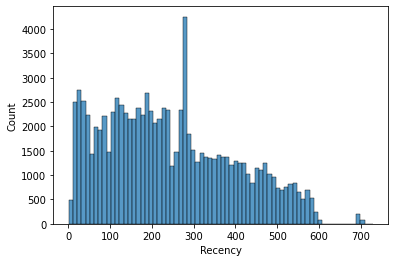

In [72]:
sns.histplot(RFM['Recency']) #распределение в какой-то степени равномерно, можно попробовать сегментировать

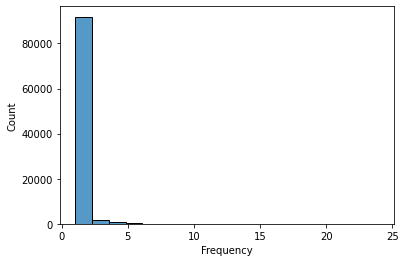

In [73]:
sns.histplot(RFM['Frequency']) # распределение неравномерно, сегментировать затруднительно

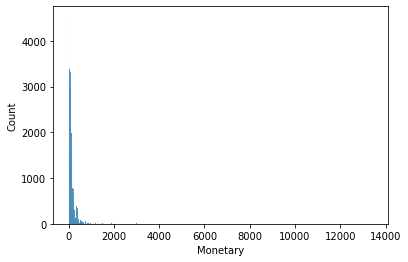

In [74]:
sns.histplot(RFM['Monetary']) #распределение неравномерно, сегментировать затруднительно

Таблица RFM показывает квартили для Recency:
- 25-й процентиль: 119 дней
- 50-й процентиль (медиана): 224 дня
- 75-й процентиль: 352 дня

In [75]:
#посмотрим уникальные значения Frequency
RFM.Frequency.value_counts()

1     82932
2      8921
3      1661
4       627
5       244
6       193
7        45
8        16
9        11
10       11
11       11
12        9
14        3
13        2
15        2
20        2
21        1
16        1
18        1
24        1
Name: Frequency, dtype: int64

In [76]:
RFM.Frequency.nunique()

20

In [77]:
RFM.Monetary.value_counts()

59.90     1602
69.90     1491
49.90     1332
89.90     1152
99.90     1128
          ... 
80.70        1
34.74        1
166.26       1
517.99       1
117.89       1
Name: Monetary, Length: 8539, dtype: int64

## Исходя из этих значений, мы можем разделить Recency на следующие сегменты:
- Сегмент 1: Recency <= 224 дней (наиболее активные пользователи)
- Сегмент 2: 224 дней < Recency <= 352 дней
- Сегмент 3: Recency > 352 дней (наименее активные пользователи)

In [78]:
R1 = 224
R2 = 352

In [79]:
def recency_segment(recency, R1, R2):
    if recency <= R1:
        return 1
    elif recency > R1 and recency <= R2:
        return 2
    else:
        return 3


Значений Frequency не так много, можно поделить на три группы
Разделим их на 3 группы
- 1 покупка - разовые покупки
- 2-3 покупки - постоянные клиенты
- больше трех покупок - редкие клиенты

In [80]:
F1 = 1
F2 = 3

In [81]:
def frequency_segment(frequency, F1, F2):
    if frequency == F1:
        return 1
    elif frequency in [2, 3]:
        return 2
    else:
        return 3


In [82]:
# определим значения интервалов для Мonetary

log_M_mean = np.mean(np.log(RFM.Monetary)) #среднее
log_M_stdev = np.std(np.log(RFM.Monetary))

#вычислим границы М возведением в экспоненту и округлением до целого
M1 = np.exp(log_M_mean - log_M_stdev).round(0)
M2 = np.exp(log_M_mean + log_M_stdev).round(0)
print(M1,M2)

34.0 223.0


In [83]:

M1 = np.exp(log_M_mean - log_M_stdev).round(0)
M2 = np.exp(log_M_mean + log_M_stdev).round(0)

def monetary_segment(monetary, M1, M2):
    if monetary <= M1:
        return 1
    elif monetary > M1 and monetary <= M2:
        return 2
    else:
        return 3


In [84]:
# Применяем функцию к столбцам и создаем новые
RFM['R'] = RFM.Recency.apply(recency_segment, args=(R1, R2))
RFM['F'] = RFM.Frequency.apply(frequency_segment, args=(F1, F2))
RFM['M'] = RFM.Monetary.apply(monetary_segment, args=(M1, M2))
RFM['RFM'] = RFM['R'].astype(str) + RFM['F'].astype(str) + RFM['M'].astype(str)

RFM.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,1,1,2,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,1,1,1,111
2,0000f46a3911fa3c0805444483337064,542,1,69.00,3,1,2,312
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,2,212


Посмотрим на распределение с помощью графиков


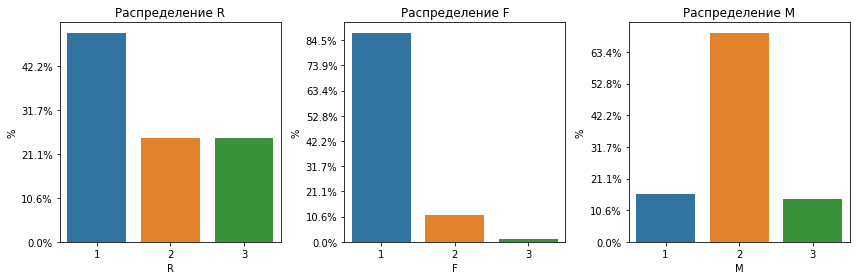

In [85]:
# Список столбцов для построения графиков
columns = ['R', 'F', 'M']

# Создаем сетку графиков
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 4))

# Итерируемся по столбцам и строим графики
for i, column in enumerate(columns):
    # Получаем количество значений в текущем столбце
    value_counts = RFM[column].value_counts()
    
    # Вычисляем процентное соотношение
    percentages = value_counts / len(RFM) * 100
    
    # Строим барплот
    sns.countplot(data=RFM, x=column, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('%')
    axes[i].set_title(f'Распределение {column}')
    
    # Изменяем метки на оси ординат на проценты
    axes[i].set_yticklabels(['{:.1f}%'.format(x) for x in axes[i].get_yticks() / len(RFM) * 100])

plt.tight_layout()
plt.show()


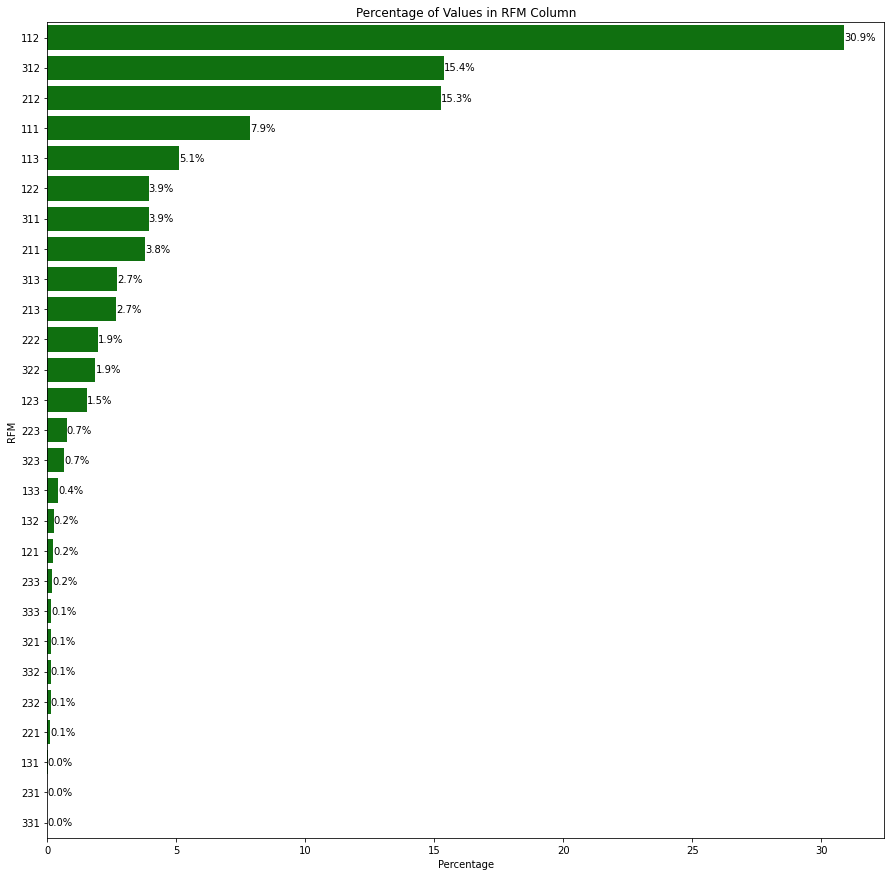

In [86]:
# Получаем количество значений в столбце RFM
value_counts = RFM['RFM'].value_counts()

# Вычисляем процентное соотношение
percentages = value_counts / len(RFM) * 100

# Создаем новую фигуру с заданным размером
plt.figure(figsize=(15, 15))

# Строим горизонтальный барплот
sns.barplot(x=percentages, y=value_counts.index, orient='h',color='green')
plt.xlabel('Percentage')
plt.ylabel('RFM')
plt.title('Percentage of Values in RFM Column')



# Добавляем процентные значения на график
for i, p in enumerate(percentages):
    plt.text(p, i, f'{p:.1f}%', ha='left', va='center')

plt.show()



Выводы:
Большинство пользователей относятся к кластерам 112, 312, 212

распределение Recency: 
Сегмент 1: Recency <= 224 дней (наиболее активные пользователи) (большинство пользователей, что хорошо)
Сегмент 2: 224 дней < Recency <= 352 дней
Сегмент 3: Recency > 352 дней (наименее активные пользователи)

распределение Frequency:
Сегмент 1: 1 покупка - разовые покупки (подавляющее большинство клиентов, на это стоит обратить внимание для  улучшение сервиса и повышении продаж)
Сегмент 2: 2-3 покупки - постоянные клиенты
Сегмент 3: больше трех покупок - редкие клиенты

распределение Monetary:
Сегмент 1: меньше 34.0 рублей включительно
Сегмент 2: больше 34.0 и до 223.0 рублей 
Сегмент 3: больше 223.0 включительно
